In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


# Attribute Information:

Input variables:
## bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

## related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means 
client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
dataFrame=pd.read_csv("bank.csv",sep=';')

In [3]:
df=dataFrame.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [6]:
col=df.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
unknown=[]
for i in df.columns:
    unique_val=df[i].unique()
    print(f" {i} := {df[i].unique()}")
    for j in unique_val:
        if j=='unknown':
            unknown.append(i)


 age := [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
 job := ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
 marital := ['married' 'single' 'divorced']
 education := ['primary' 'secondary' 'tertiary' 'unknown']
 default := ['no' 'yes']
 balance := [ 1787  4789  1350 ...  -333 -3313  1137]
 housing := ['no' 'yes']
 loan := ['no' 'yes']
 contact := ['cellular' 'unknown' 'telephone']
 day := [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
 month := ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
 duration := [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74

In [8]:
unknown

['job', 'education', 'contact', 'poutcome']

#### Removing Rows having 'unknown'

In [9]:
df=df[~df.job.str.contains("unknown")]
df=df[~df.education.str.contains("unknown")]
df=df[~df.contact.str.contains("unknown")]
df=df[~df.poutcome.str.contains("unknown")]

In [10]:
df.head

<bound method NDFrame.head of       age            job  marital  education default  balance housing loan  \
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
5      35     management   single   tertiary      no      747      no   no   
6      36  self-employed  married   tertiary      no      307     yes   no   
9      43       services  married    primary      no      -88     yes  yes   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4492   32     technician   single  secondary      no      309     yes  yes   
4504   42    blue-collar   single  secondary      no     1080     yes  yes   
4514   38    blue-collar  married  secondary      no     1205     yes   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  durati

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,764.0,41.277487,11.331024,20.0,33.00,38.0,48.00,86.0
balance,764.0,1600.434555,2980.860786,-1400.0,141.25,624.5,1648.75,26306.0
day,764.0,14.585079,7.814483,1.0,7.75,14.0,19.25,31.0
duration,764.0,273.887435,246.587595,5.0,119.75,203.0,332.00,1579.0
campaign,764.0,2.037958,1.590395,1.0,1.00,1.0,2.00,11.0
pdays,764.0,224.634817,113.201111,1.0,140.00,190.0,329.25,871.0
previous,764.0,3.019634,2.939919,1.0,1.00,2.0,4.00,25.0


In [12]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [13]:
df[df['default']=='yes']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
124,51,management,single,tertiary,yes,-55,yes,no,cellular,11,may,281,2,266,6,failure,no
1226,32,admin.,divorced,secondary,yes,5,yes,yes,cellular,18,may,82,3,363,2,other,no
2818,57,entrepreneur,divorced,secondary,yes,25,yes,no,cellular,11,may,652,1,370,4,other,no
3976,48,management,married,tertiary,yes,-13,yes,no,cellular,15,may,20,6,291,2,other,no
4089,32,blue-collar,married,secondary,yes,-53,yes,no,cellular,16,apr,648,1,272,1,other,yes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009ED3D0F940>,
      dtype=object)

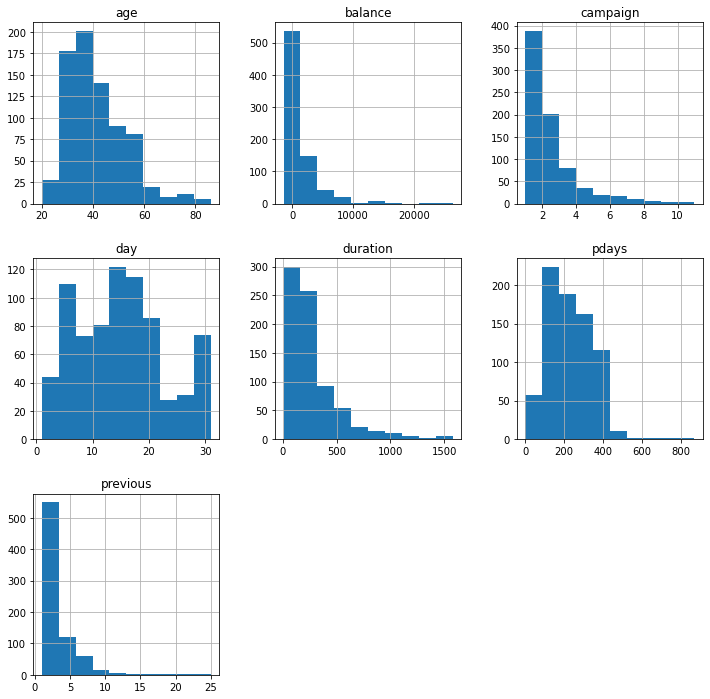

In [14]:
df.hist(figsize=(12,12))

<IPython.core.display.Javascript object>

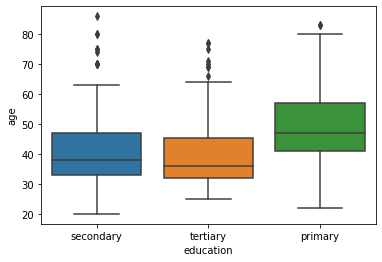

In [15]:
sns.boxplot(y=df['age'],x=df['education'])

# Label Encoder
### Label Encoder Fit and Transform Method

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
# Lable Encoder Example
le.fit(['abc','ab','abcd','abcg','b','ace','a','acd'])
print(list(le.classes_))
value=le.transform(['abc','ab','abcd','abcg','b','ace','acd','a'])
print(np.unique(value))
print()

['a', 'ab', 'abc', 'abcd', 'abcg', 'acd', 'ace', 'b']
[0 1 2 3 4 5 6 7]



In [18]:
category_column=[]
for i in df.columns:
    if df[i].dtype=='object':
        category_column.append(i)
    

In [19]:
category_column

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

#### Example for just one column to see how it works

In [20]:
le.fit(df['job'])
print(list(le.classes_))
value=le.transform(df['job'])
print(np.unique(value))
value


['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']
[ 0  1  2  3  4  5  6  7  8  9 10]


array([ 7,  4,  4,  6,  7,  1,  0,  7,  4,  1,  9,  1,  4,  1, 10,  7,  0,
        1,  4,  4,  8,  1,  4,  1,  0,  0,  0,  9,  4,  0,  0,  0,  0,  7,
        9,  5,  9,  9,  4,  9,  7,  9,  1,  9,  9,  9,  1,  1,  4,  9,  5,
        9,  7,  3,  0,  5,  1,  0,  2,  4,  9, 10,  9,  4,  5,  4,  1,  4,
        6,  4,  4,  4,  2,  0,  7,  4,  1,  7,  4,  1,  9,  4,  0,  5,  4,
        4,  1,  0,  4,  1,  3,  5,  9,  0,  3,  4,  1,  9, 10,  4,  5,  0,
        7,  0,  9,  5,  0,  9,  9,  4,  1,  9,  3,  1,  9,  9,  4,  4,  9,
        4,  4,  3,  2,  5,  9,  9,  2,  9,  4,  9,  9,  7,  7,  2,  8,  1,
        9,  4,  1,  9,  7,  7,  4,  4,  9,  4,  1,  4,  4,  9,  9,  9,  7,
        4,  6,  4, 10,  7,  4,  3,  4,  1,  9,  9,  4,  0,  9,  2,  4,  8,
        4,  9,  0,  1,  4,  0,  4,  4, 10,  9,  1,  6,  9,  6,  4,  8,  9,
        4,  1,  0,  7,  2,  4,  1,  4,  0,  3,  9,  4,  4,  1,  4,  9,  9,
        9,  9,  9,  4,  7,  0,  4, 10,  9,  9,  4,  7,  9,  1,  4,  6,  5,
        0,  4,  4,  1,  0

### Applying Lable Encoder to all column having categorical Data

In [21]:
for i in category_column:
    le.fit(df[i])
    print(list(le.classes_))
    value=le.transform(df[i])
    print(np.unique(value))
    df[i]=value
    print()

['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']
[ 0  1  2  3  4  5  6  7  8  9 10]

['divorced', 'married', 'single']
[0 1 2]

['primary', 'secondary', 'tertiary']
[0 1 2]

['no', 'yes']
[0 1]

['no', 'yes']
[0 1]

['no', 'yes']
[0 1]

['cellular', 'telephone']
[0 1]

['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
[ 0  1  2  3  4  5  6  7  8  9 10 11]

['failure', 'other', 'success']
[0 1 2]

['no', 'yes']
[0 1]



In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,32,9,2,1,0,309,1,1,0,16,0,346,1,234,3,0,0
4504,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0,1
4514,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [23]:

df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0
14,31,1,1,1,0,360,1,1,0,29,4,89,1,241,1,0,0
17,37,0,2,2,0,2317,1,0,0,20,0,114,1,152,2,0,0
19,31,7,1,1,0,132,0,0,0,7,5,148,1,152,1,1,0
38,33,4,1,1,0,3935,1,0,0,6,8,765,1,342,2,0,1
46,55,1,1,0,0,145,0,0,1,2,3,59,3,5,2,1,0


<IPython.core.display.Javascript object>

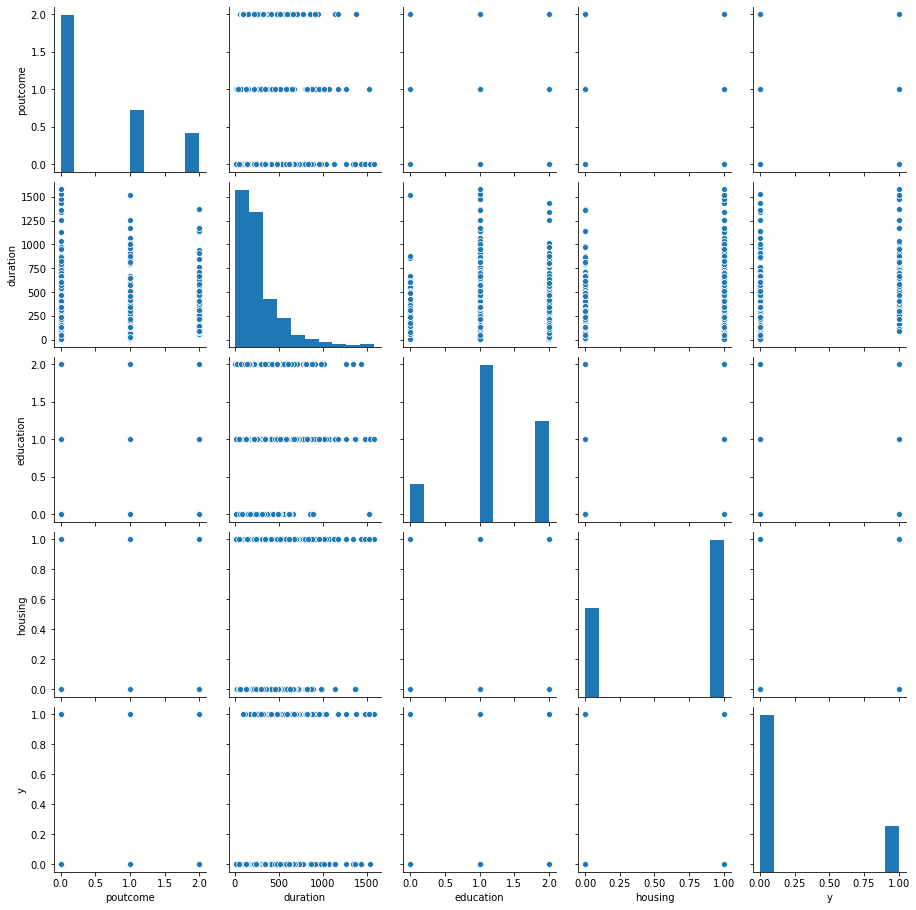

In [24]:
sns.pairplot(df[['poutcome','duration','education','housing','y']])

# Adding Constant 

In [25]:
import statsmodels.api as sm

In [26]:
X=df.iloc[:,:-1]
Y=df['y']

In [27]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,32,9,2,1,0,309,1,1,0,16,0,346,1,234,3,0
4504,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0
4514,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [28]:
Y

1       0
2       0
5       0
6       0
9       0
       ..
4492    0
4504    1
4514    0
4519    0
4520    0
Name: y, Length: 764, dtype: int32

In [29]:
X1=sm.add_constant(X)

In [30]:
X1

,const,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1,1.0,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,1.0,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
5,1.0,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0
6,1.0,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1
9,1.0,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,1.0,32,9,2,1,0,309,1,1,0,16,0,346,1,234,3,0
4504,1.0,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0
4514,1.0,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0
4519,1.0,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [31]:
logistic=sm.Logit(Y,X1)

In [32]:
logistic

In [33]:
reasult=logistic.fit()

Optimization terminated successfully.
         Current function value: 0.391720
         Iterations 7


### Here Column having P-value < 0.05 are  significantly Important  i.e they have more Impact on dependant Variable
####  Column having P-value < 0.05 plays a major role in making decision wether  the client subscribed a term deposit? (binary: 'yes','no') 

In [34]:
reasult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  764
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                           16
Date:                Sat, 01 May 2021   Pseudo R-squ.:                  0.2633
Time:                        01:30:40   Log-Likelihood:                -299.27
converged:                       True   LL-Null:                       -406.22
Covariance Type:            nonrobust   LLR p-value:                 1.215e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0791      0.815     -3.779      0.000      -4.676      -1.482
age            0.0027      0.010      0.263      0.792      -0.017       0.023
job            0.0218      0.034      0.649      0.517      -0.044       0.088
marital       -0.1279      0.187     -0.682      0.495      -0.495       0.239
education      0.3777      0.172      2.196      0.028       0.041       0.715
default       -0.2436      1.222     -0.199      0.842      -2.639       2.152
balance    -5.719e-06   3.88e-05     -0.148      0.883   -8.17e-05    7.03e-05
housing       -0.9815      0.235     -4.174      0.000      -1.442      -0.521
loan          -0.1921      0.366     -0.524      0.600      -0.910       0.526
contact       -0.5638      0.392     -1.439      0.150      -1.332       0.204
day            0.0128      0.013      0.969      0.333      -0.013       0.039
month         -0.0069      0.030     -0.233      0.816      -0.065       0.052
duration       0.0033      0.000      8.029      0.000       0.002       0.004
campaign      -0.0128      0.073     -0.175      0.861      -0.155       0.130
pdays       8.131e-05      0.001      0.084      0.933      -0.002       0.002
previous       0.0027      0.036      0.075      0.940      -0.068       0.074
poutcome       1.0420      0.134      7.793      0.000       0.780       1.304
==============================================================================
"""

In [35]:
df_imp_col=X[['poutcome','duration','education','housing']]

df_imp_col

,poutcome,duration,education,housing
1,0,220,1,1
2,0,185,2,1
5,0,141,2,0
6,1,341,2,1
9,0,313,0,1
...,...,...,...,...
4492,0,346,1,1
4504,0,951,1,1
4514,0,45,1,1
4519,1,129,1,0


In [36]:
Y

1       0
2       0
5       0
6       0
9       0
       ..
4492    0
4504    1
4514    0
4519    0
4520    0
Name: y, Length: 764, dtype: int32

# Model Developement

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train,X_test,y_train,y_test=train_test_split(df_imp_col,Y,test_size=0.2, random_state=1)

In [39]:
print(X_train.shape,y_train.size)
print(X_test.shape,y_test.size)

(611, 4) 611
(153, 4) 153


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
logistic_reg=LogisticRegression()

In [42]:
logistic_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_predict=logistic_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [44]:
print(y_predict.shape,y_test.shape)

(153,) (153,)


In [45]:
data = {'Y': y_test, 'Y_predict':y_predict}

predictdf=pd.DataFrame(data)

In [46]:
predictdf

,Y,Y_predict
2776,0,0
804,0,1
4397,0,0
3172,0,0
2359,0,0
...,...,...
2988,1,0
3831,0,0
3043,0,0
1886,1,0


### The result is telling us that we have 110+13=123 correct predictions and 23+7=30 incorrect predictions.

In [47]:
#Accuraccy is 80 % so 80% of 153 sample 
print(153*80/100)
#InAccuraccy is 20 % so 20% of 153 sample 
print(153*20/100)

122.4
30.6


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[110   7]
 [ 23  13]]


## Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The 
precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       117
           1       0.65      0.36      0.46        36

    accuracy                           0.80       153
   macro avg       0.74      0.65      0.67       153
weighted avg       0.79      0.80      0.78       153



In [50]:

logistic_reg.predict([[0,951,1,1]])


array([0])

In [51]:

logistic_reg.predict([[2,268,2,0]])


array([1])